In [7]:
import pandas as pd

caminho_do_csv = 'Painel_BR_Final.csv'
dados = pd.read_csv(caminho_do_csv, encoding='utf-8')

# Converta a coluna 'ANO_TRATAM' em strings
dados['ANO_TRATAM'] = dados['ANO_TRATAM'].astype(str)

# Use o método .str.replace() para remover o ".0"
dados['ANO_TRATAM'] = dados['ANO_TRATAM'].str.replace('.0', '')

# Função para remover o último zero à direita
def remove_last_zero(value):
    if value.endswith("0"):
        return value[:value.rfind("0")]
    return value

# Aplica a função para remover o último zero à direita à coluna 'ANO_TRATAM'
dados['ANO_TRATAM'] = dados['ANO_TRATAM'].apply(remove_last_zero)
print(dados['ANO_TRATAM'])
# Salva o DataFrame modificado em um novo arquivo CSV chamado 'PainelOncoBr.csv'
dados.to_csv('PainelOncoBr.csv', index=False, encoding='utf-8')


0          nan
1          nan
2         2021
3          nan
4          nan
          ... 
106699    2022
106700    2019
106701    2019
106702     nan
106703     nan
Name: ANO_TRATAM, Length: 106704, dtype: object


In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Asia", "Europe", "Africa", "Americas", "Oceania"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1980', '2007'])
fig.add_trace(go.Pie(labels=labels, values=[4, 7, 1, 7, 0.5], scalegroup='one',
                     name="World GDP 1980"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[21, 15, 3, 19, 1], scalegroup='one',
                     name="World GDP 2007"), 1, 2)

fig.update_layout(title_text='World GDP')
fig.show()

In [15]:
import csv

def concatenate_csvs(csv1, csv2, output_csv):
    """
    Concatena dois arquivos CSV em um único arquivo, sem duplicar as informações.

    Args:
        csv1: O caminho do primeiro arquivo CSV.
        csv2: O caminho do segundo arquivo CSV.
        output_csv: O caminho do arquivo CSV de saída.

    Returns:
        None.
    """

    with open(csv1, "r") as f1, open(csv2, "r") as f2, open(output_csv, "w", newline="") as f3:
        reader1 = csv.reader(f1)
        reader2 = csv.reader(f2)
        writer = csv.writer(f3)

        # Lê as linhas dos dois arquivos CSV.
        lines1 = list(reader1)
        lines2 = list(reader2)

        # Cria um dicionário com as linhas dos dois arquivos CSV.
        rows = {}
        for line1 in lines1:
            if line1:  # Verifica se a linha não está vazia
                rows[line1[0]] = line1
        for line2 in lines2:
            if line2:  # Verifica se a linha não está vazia
                rows[line2[0]] = line2

        # Escreve as linhas únicas no arquivo de saída.
        for row in rows.values():
            writer.writerow(row)

if __name__ == "__main__":
    csv1 = "axuliares/estab_trat.csv"
    csv2 = "Estabelecimento diagnóstico .csv"
    output_csv = "arquivo_saida.csv"

    concatenate_csvs(csv1, csv2, output_csv)


Text(0, 0.5, 'Quantidade')

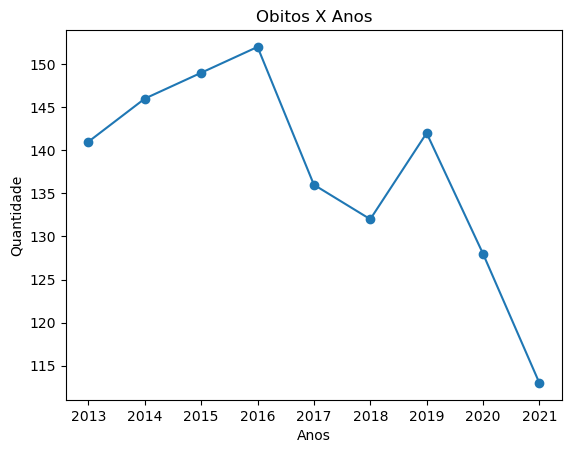

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV usando o Pandas
dados = pd.read_csv('obitos.csv')

# Extrair os valores de x e y do DataFrame
x = dados['Anos']
y = dados['quantidade']

# Criar um gráfico de linhas
plt.plot(x, y, marker='o')
plt.title("Obitos X Anos")
# Adicionar rótulos aos eixos
plt.xlabel('Anos')
plt.ylabel('Quantidade')

# Adicionar título ao gráficodados

In [22]:
import pandas as pd

# Exemplo de DataFrames
data1 = {'ID': [1, 2, 3, 4],
         'Valor': [100, 200, 150, 300]}
data2 = {'ID': [3, 4, 5, 6],
         'Valor': [150, 300, 250, 400]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Combinando DataFrames e tratando duplicatas
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined = df_combined.drop_duplicates()

print(df_combined)


   ID  Valor
0   1    100
1   2    200
2   3    150
3   4    300
6   5    250
7   6    400


In [ ]:
from ftplib import FTP
import os

def download_arquivo(ftp, arquivo_ftp, caminho_local):
    with open(caminho_local, 'wb') as arquivo_local:
        ftp.retrbinary(f"RETR {arquivo_ftp}", arquivo_local.write)

# Dados de conexão FTP ftp://ftp.datasus.gov.br/dissemin/publicos/painel_oncologia/Dados/
host = "ftp.datasus.gov.br"
pasta_ftp = "/dissemin/publicos/painel_oncologia/Dados/"

# Diretório local onde os arquivos serão salvos
diretorio_destino = "downloads"

# Conexão FTP
ftp = FTP(host)
ftp.login()  # Se a pasta FTP for pública e não requer autenticação, não é necessário fornecer usuário e senha.

# Lista de arquivos disponíveis no FTP
ftp.cwd(pasta_ftp)  # Mudar para a pasta FTP
arquivos_ftp = ftp.nlst()


# Fazer o download de todos os arquivos disponíveis

for arquivo in arquivos_ftp:
    caminho_destino = os.path.join(diretorio_destino, os.path.basename(arquivo))
    if not os.path.exists(diretorio_destino):
        os.makedirs(diretorio_destino)
    download_arquivo(ftp, arquivo, caminho_destino)
    print(f"Download do arquivo {os.path.basename(arquivo)} concluído com sucesso.")

# Fechar a conexão FTP
ftp.quit()


In [10]:
#Junta PDFs
import pandas as pd
import glob

# Lista todos os arquivos CSV no diretório
arquivos = glob.glob('Doc/*.csv')

# Cria uma lista para armazenar os dataframes de cada arquivo
dataframes = []

# Lê cada arquivo CSV e adiciona o dataframe à lista
for arquivo in arquivos:
    df = pd.read_csv(arquivo,encoding='ISO-8859-1')
    dataframes.append(df)

# Junta os dataframes usando a função concat do pandas
df_final = pd.concat(dataframes)

# Salva o dataframe final em um novo arquivo CSV
df_final.to_csv('PO13_23_.csv', index=False)

In [1]:
import pandas as pd
df2 = pd.read_csv('sexoPO.csv', sep=",",encoding='ISO-8859-1')
df2

,Categoria,Sexo
0,M,Masculino
1,F,Feminino


In [2]:
#ler CSV
import pandas as pd
df = pd.read_csv('Painel_BR.csv', sep=",",encoding='utf-8')
df

,Unnamed: 0.2,Column1,Unnamed: 0.1,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,0,0,0,5,2021,202105,NaN,NaN,MA,210530,...,F,90.0,2531348 HOSPITAL SAO RAFAEL,NaN,999990.0,NaN,C79- Neoplasia maligna secundária de outras lo...,03/05/2021,NaN,26/09/2014
1,1,1,1,50,2021,202109,NaN,NaN,AL,270030,...,F,90.0,2005069 NPDC,NaN,999990.0,NaN,D48- Neoplasia de comportamento incerto ou des...,21/09/2021,NaN,28/08/2012
2,2,2,2,98,2021,202104,20210.0,2021040.0,GO,520870,...,M,10.0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,0.0,NaN,C64- Neoplasia maligna do rim,14/04/2021,14/04/2021,30/01/2019
3,3,3,3,179,2021,202103,NaN,NaN,MG,313620,...,M,90.0,2171554 CELULA LABORATORIO DE ANATOMIA PATOLOGICA,NaN,999990.0,NaN,D04- Carcinoma in situ da pele,19/03/2021,NaN,31/07/2007
4,4,4,4,225,2021,202101,NaN,NaN,MG,314600,...,F,90.0,2081482 BOLDRINI CAMPINAS,NaN,999990.0,NaN,C85- Linfoma não Hodgkin de outros tipos e de ...,29/01/2021,NaN,06/02/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106699,106699,106699,106699,3720897,2019,201911,20220.0,2022100.0,RR,140010,...,M,NaN,7068336 HOSPITAL DE AMOR AMAZONIA,7068336 HOSPITAL DE AMOR AMAZONIA,10530.0,NaN,C95- Leucemia de tipo celular não especificado,19/11/2019,07/10/2022,07/10/2014
106700,106700,106700,106700,3720938,2019,201901,20190.0,2019010.0,SP,355030,...,F,NaN,2077531 A C CAMARGO CANCER CENTER,2077531 A C CAMARGO CANCER CENTER,150.0,NaN,C92- Leucemia mielóide,13/01/2019,28/01/2019,07/07/1999
106701,106701,106701,106701,3720944,2019,201906,20190.0,2019060.0,ES,320465,...,F,NaN,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,10.0,NaN,C92- Leucemia mielóide,11/06/2019,12/06/2019,06/05/2010
106702,106702,106702,106702,3720949,2019,201905,NaN,NaN,PE,260345,...,M,90.0,0000434 IMIP,NaN,999990.0,NaN,D37- Neoplasia de comportamento incerto ou des...,23/05/2019,NaN,01/04/2004


In [2]:
def formatar_ano(valor):
    try:
        # Tente converter o valor em um número inteiro e retornar como string
        return str(int(float(valor)))
    except ValueError:
        # Se não for possível converter, mantenha o valor original
        return valor

# Aplique a função de formatação à coluna
df['ANO_TRATAM'] = df['ANO_TRATAM'].apply(formatar_ano)

In [5]:
df['ANO_TRATAM'] = pd.to_numeric(df['ANO_TRATAM'], errors='coerce')


In [6]:
df['ANO_TRATAM'] = df['ANO_TRATAM'].fillna(0).astype(int)


In [4]:
df['ANO_TRATAM']

0           NaN
1           NaN
2         20210
3           NaN
4           NaN
          ...  
106699    20220
106700    20190
106701    20190
106702      NaN
106703      NaN
Name: ANO_TRATAM, Length: 106704, dtype: object

In [12]:
df

,Unnamed: 0.2,Column1,Unnamed: 0.1,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,0,0,0,5,2021,202105,nan,NaN,MA,210530,...,F,90.0,2531348 HOSPITAL SAO RAFAEL,NaN,999990.0,NaN,C79- Neoplasia maligna secundária de outras lo...,03/05/2021,NaN,26/09/2014
1,1,1,1,50,2021,202109,nan,NaN,AL,270030,...,F,90.0,2005069 NPDC,NaN,999990.0,NaN,D48- Neoplasia de comportamento incerto ou des...,21/09/2021,NaN,28/08/2012
2,2,2,2,98,2021,202104,2,2021040.0,GO,520870,...,M,10.0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,0.0,NaN,C64- Neoplasia maligna do rim,14/04/2021,14/04/2021,30/01/2019
3,3,3,3,179,2021,202103,nan,NaN,MG,313620,...,M,90.0,2171554 CELULA LABORATORIO DE ANATOMIA PATOLOGICA,NaN,999990.0,NaN,D04- Carcinoma in situ da pele,19/03/2021,NaN,31/07/2007
4,4,4,4,225,2021,202101,nan,NaN,MG,314600,...,F,90.0,2081482 BOLDRINI CAMPINAS,NaN,999990.0,NaN,C85- Linfoma não Hodgkin de outros tipos e de ...,29/01/2021,NaN,06/02/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106699,106699,106699,106699,3720897,2019,201911,2,2022100.0,RR,140010,...,M,NaN,7068336 HOSPITAL DE AMOR AMAZONIA,7068336 HOSPITAL DE AMOR AMAZONIA,10530.0,NaN,C95- Leucemia de tipo celular não especificado,19/11/2019,07/10/2022,07/10/2014
106700,106700,106700,106700,3720938,2019,201901,1,2019010.0,SP,355030,...,F,NaN,2077531 A C CAMARGO CANCER CENTER,2077531 A C CAMARGO CANCER CENTER,150.0,NaN,C92- Leucemia mielóide,13/01/2019,28/01/2019,07/07/1999
106701,106701,106701,106701,3720944,2019,201906,1,2019060.0,ES,320465,...,F,NaN,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,10.0,NaN,C92- Leucemia mielóide,11/06/2019,12/06/2019,06/05/2010
106702,106702,106702,106702,3720949,2019,201905,nan,NaN,PE,260345,...,M,90.0,0000434 IMIP,NaN,999990.0,NaN,D37- Neoplasia de comportamento incerto ou des...,23/05/2019,NaN,01/04/2004


In [5]:
quantidadePacientes=df[((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

quantidadePacientes.to_csv('painelBR_0_19.csv')

In [2]:
tabela_uf = pd.read_csv('cid-10.csv', sep=";",encoding='ISO-8859-1')
tabela_uf

,diag,CID
0,C00,C00- Neoplasia maligna do lábio
1,C01,C01- Neoplasia maligna da base da língua
2,C02,C02- Neoplasia maligna de outras partes e de p...
3,C03,C03- Neoplasia maligna da gengiva
4,C04,C04- Neoplasia maligna do assoalho da boca
...,...,...
104,D44,D44- Neoplasia de comportamento incerto ou des...
105,D45,D45- Policitemia vera
106,D46,D46- Síndromes mielodisplásicas
107,D47,D47- Outras neoplasias de comportamento incert...


In [6]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,0,0,5,2021,202105,NaN,NaN,MA,210530,NaN,...,F,9.0,2531348 HOSPITAL SAO RAFAEL,NaN,99999.0,NaN,C79- Neoplasia maligna secundÃ¡ria de outras l...,03/05/2021,NaN,26/09/2014
1,1,1,50,2021,202109,NaN,NaN,AL,270030,NaN,...,F,9.0,2005069 NPDC,NaN,99999.0,NaN,D48- Neoplasia de comportamento incerto ou des...,21/09/2021,NaN,28/08/2012
2,2,2,98,2021,202104,2021.0,202104.0,GO,520870,DF,...,M,1.0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,0.0,NaN,C64- Neoplasia maligna do rim,14/04/2021,14/04/2021,30/01/2019
3,3,3,179,2021,202103,NaN,NaN,MG,313620,NaN,...,M,9.0,2171554 CELULA LABORATORIO DE ANATOMIA PATOLOGICA,NaN,99999.0,NaN,D04- Carcinoma in situ da pele,19/03/2021,NaN,31/07/2007
4,4,4,225,2021,202101,NaN,NaN,MG,314600,NaN,...,F,9.0,2081482 BOLDRINI CAMPINAS,NaN,99999.0,NaN,C85- Linfoma nÃ£o Hodgkin de outros tipos e de...,29/01/2021,NaN,06/02/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106699,106699,106699,3720897,2019,201911,2022.0,202210.0,RR,140010,RO,...,M,NaN,7068336 HOSPITAL DE AMOR AMAZONIA,7068336 HOSPITAL DE AMOR AMAZONIA,1053.0,NaN,C95- Leucemia de tipo celular nÃ£o especificado,19/11/2019,07/10/2022,07/10/2014
106700,106700,106700,3720938,2019,201901,2019.0,201901.0,SP,355030,SP,...,F,NaN,2077531 A C CAMARGO CANCER CENTER,2077531 A C CAMARGO CANCER CENTER,15.0,NaN,C92- Leucemia mielÃ³ide,13/01/2019,28/01/2019,07/07/1999
106701,106701,106701,3720944,2019,201906,2019.0,201906.0,ES,320465,ES,...,F,NaN,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,1.0,NaN,C92- Leucemia mielÃ³ide,11/06/2019,12/06/2019,06/05/2010
106702,106702,106702,3720949,2019,201905,NaN,NaN,PE,260345,NaN,...,M,9.0,0000434 IMIP,NaN,99999.0,NaN,D37- Neoplasia de comportamento incerto ou des...,23/05/2019,NaN,01/04/2004


In [24]:
tabela_uf['diag']

0      C00 
1      C01 
2      C02 
3      C03 
4      C04 
       ... 
104    D44 
105    D45 
106    D46 
107    D47 
108    D48 
Name: diag, Length: 109, dtype: object

In [3]:
tabela_uf = pd.read_csv('sexoPO.csv', sep=",")
tabela_uf

,Categoria,Sexo
0,M,Masculino
1,F,Feminino


In [7]:
tabela_uf = pd.read_csv('sexoPO.csv', sep=",")
#tabela_uf = pd.read_csv('estab_trat.csv', sep=";",encoding='ISO-8859-1')
tabela_uf['Categoria'] = tabela_uf['Categoria']
codigo_uf = tabela_uf.set_index('Categoria')

dicionario_uf = codigo_uf.to_dict()['Sexo']
dicionario_uf

df['SEXO'] = df['SEXO'].replace(dicionario_uf)
#df['CNES_TRAT'] = df['CNES_TRAT'].replace(dicionario_uf)

df.to_csv('Painel_BR_Final.csv')

In [4]:
tabela_uf = pd.read_csv('https://raw.githubusercontent.com/andrejarenkow/csv/master/cod_uf.csv')
tabela_uf['Código UF'] = tabela_uf['Código UF']
codigo_uf = tabela_uf.set_index('Código UF')

dicionario_uf = codigo_uf.to_dict()['UF']

df['UF_RESID'] = df['UF_RESID'].replace(dicionario_uf)
df['UF_DIAGN'] = df['UF_DIAGN'].replace(dicionario_uf)
df['UF_TRATAM'] = df['UF_TRATAM'].replace(dicionario_uf)

df

,Unnamed: 0.1,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,0,5,2021,202105,NaN,NaN,MA,210530,NaN,NaN,...,F,9.0,2531348 HOSPITAL SAO RAFAEL,NaN,99999.0,NaN,C79- Neoplasia maligna secundária de outras lo...,03/05/2021,NaN,26/09/2014
1,1,50,2021,202109,NaN,NaN,AL,270030,NaN,NaN,...,F,9.0,2005069 NPDC,NaN,99999.0,NaN,D48- Neoplasia de comportamento incerto ou des...,21/09/2021,NaN,28/08/2012
2,2,98,2021,202104,2021.0,202104.0,GO,520870,DF,530010.0,...,M,1.0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,0.0,NaN,C64- Neoplasia maligna do rim,14/04/2021,14/04/2021,30/01/2019
3,3,179,2021,202103,NaN,NaN,MG,313620,NaN,NaN,...,M,9.0,2171554 CELULA LABORATORIO DE ANATOMIA PATOLOGICA,NaN,99999.0,NaN,D04- Carcinoma in situ da pele,19/03/2021,NaN,31/07/2007
4,4,225,2021,202101,NaN,NaN,MG,314600,NaN,NaN,...,F,9.0,2081482 BOLDRINI CAMPINAS,NaN,99999.0,NaN,C85- Linfoma não Hodgkin de outros tipos e de ...,29/01/2021,NaN,06/02/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106699,106699,3720897,2019,201911,2022.0,202210.0,RR,140010,RO,110020.0,...,M,NaN,7068336 HOSPITAL DE AMOR AMAZONIA,7068336 HOSPITAL DE AMOR AMAZONIA,1053.0,NaN,C95- Leucemia de tipo celular não especificado,19/11/2019,07/10/2022,07/10/2014
106700,106700,3720938,2019,201901,2019.0,201901.0,SP,355030,SP,355030.0,...,F,NaN,2077531 A C CAMARGO CANCER CENTER,2077531 A C CAMARGO CANCER CENTER,15.0,NaN,C92- Leucemia mielóide,13/01/2019,28/01/2019,07/07/1999
106701,106701,3720944,2019,201906,2019.0,201906.0,ES,320465,ES,320530.0,...,F,NaN,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,0011800 HOSPITAL INFANTIL NOSSA SENHORA DA GLORIA,1.0,NaN,C92- Leucemia mielóide,11/06/2019,12/06/2019,06/05/2010
106702,106702,3720949,2019,201905,NaN,NaN,PE,260345,NaN,NaN,...,M,9.0,0000434 IMIP,NaN,99999.0,NaN,D37- Neoplasia de comportamento incerto ou des...,23/05/2019,NaN,01/04/2004


In [5]:
df.to_csv('Painel_BR_0_19_3.csv')

In [23]:
df

,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,666,2013,201305,2013.0,201305.0,RS,431580,RS,431490.0,RS,...,M,NaN,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,0.0,NaN,C91,01/05/2013,01/05/2013,09/12/1999
1,756,2013,201301,2013.0,201303.0,RS,430210,RS,430210.0,RS,...,M,4.0,HOSPITAL TACCHINI,HOSPITAL TACCHINI,67.0,NaN,C81,04/01/2013,12/03/2013,22/02/1993
2,950,2013,201301,2013.0,201301.0,RS,431265,RS,431410.0,RS,...,M,NaN,HOSPITAL DE CLINICAS,HOSPITAL DE CLINICAS,0.0,NaN,C91,31/01/2013,31/01/2013,05/07/1995
3,1139,2013,201310,2013.0,201310.0,RS,430510,RS,430510.0,RS,...,M,NaN,HOSPITAL GERAL,HOSPITAL GERAL,13.0,NaN,D46,10/10/2013,23/10/2013,14/05/2001
4,2122,2013,201306,2013.0,201306.0,RS,430790,RS,430510.0,RS,...,F,5.0,HOSPITAL TACCHINI,HOSPITAL POMPEIA,2.0,NaN,C71,05/06/2013,07/06/2013,10/10/2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,3720331,2023,202303,NaN,NaN,RS,431490,NaN,NaN,RS,...,M,9.0,HOSPITAL DE CLINICAS,NaN,99999.0,NaN,C15,02/03/2023,NaN,07/07/2011
9546,3720587,2023,202301,2023.0,202301.0,RS,431620,RS,431620.0,RS,...,F,5.0,HOSPITAL PADRE EUGENIO,HOSPITAL PADRE EUGENIO,0.0,NaN,D48,26/01/2023,26/01/2023,03/11/2003
9547,3720835,2023,202301,NaN,NaN,RS,431380,NaN,NaN,RS,...,F,9.0,INSTITUTO DE PATOLOGIA DE PASSO FUNDO E OU IPPF,NaN,99999.0,NaN,C18,13/01/2023,NaN,22/04/2004
9548,3720895,2023,202304,NaN,NaN,RS,431920,NaN,NaN,RS,...,M,9.0,HOSPITAL SAO VICENTE DE PAULO,NaN,99999.0,NaN,C40,24/04/2023,NaN,20/01/2009


In [24]:
import pandas as pd

# Combinar as colunas CNES_DIAG e CNES_TRAT em uma nova coluna "estab"
df['estab'] = pd.concat([df['CNES_DIAG'], df['CNES_TRAT']]).drop_duplicates().reset_index(drop=True)

print(df)


      Unnamed: 0  ANO_DIAGN  ANOMES_DIA  ANO_TRATAM  ANOMES_TRA UF_RESID  \
0            666       2013      201305      2013.0    201305.0       RS   
1            756       2013      201301      2013.0    201303.0       RS   
2            950       2013      201301      2013.0    201301.0       RS   
3           1139       2013      201310      2013.0    201310.0       RS   
4           2122       2013      201306      2013.0    201306.0       RS   
...          ...        ...         ...         ...         ...      ...   
9545     3720331       2023      202303         NaN         NaN       RS   
9546     3720587       2023      202301      2023.0    202301.0       RS   
9547     3720835       2023      202301         NaN         NaN       RS   
9548     3720895       2023      202304         NaN         NaN       RS   
9549     3720988       2023      202304         NaN         NaN       RS   

      MUN_RESID UF_TRATAM  MUN_TRATAM UF_DIAGN  ...  ESTADIAM  \
0        431580       

In [25]:
df

,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,...,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC,estab
0,666,2013,201305,2013.0,201305.0,RS,431580,RS,431490.0,RS,...,NaN,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,0.0,NaN,C91,01/05/2013,01/05/2013,09/12/1999,HOSPITAL NOSSA SENHORA DA CONCEICAO SA
1,756,2013,201301,2013.0,201303.0,RS,430210,RS,430210.0,RS,...,4.0,HOSPITAL TACCHINI,HOSPITAL TACCHINI,67.0,NaN,C81,04/01/2013,12/03/2013,22/02/1993,HOSPITAL TACCHINI
2,950,2013,201301,2013.0,201301.0,RS,431265,RS,431410.0,RS,...,NaN,HOSPITAL DE CLINICAS,HOSPITAL DE CLINICAS,0.0,NaN,C91,31/01/2013,31/01/2013,05/07/1995,HOSPITAL DE CLINICAS
3,1139,2013,201310,2013.0,201310.0,RS,430510,RS,430510.0,RS,...,NaN,HOSPITAL GERAL,HOSPITAL GERAL,13.0,NaN,D46,10/10/2013,23/10/2013,14/05/2001,HOSPITAL GERAL
4,2122,2013,201306,2013.0,201306.0,RS,430790,RS,430510.0,RS,...,5.0,HOSPITAL TACCHINI,HOSPITAL POMPEIA,2.0,NaN,C71,05/06/2013,07/06/2013,10/10/2001,IRMANDADE DA SANTA CASA DE MISERICORDIA DE POR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,3720331,2023,202303,NaN,NaN,RS,431490,NaN,NaN,RS,...,9.0,HOSPITAL DE CLINICAS,NaN,99999.0,NaN,C15,02/03/2023,NaN,07/07/2011,NaN
9546,3720587,2023,202301,2023.0,202301.0,RS,431620,RS,431620.0,RS,...,5.0,HOSPITAL PADRE EUGENIO,HOSPITAL PADRE EUGENIO,0.0,NaN,D48,26/01/2023,26/01/2023,03/11/2003,NaN
9547,3720835,2023,202301,NaN,NaN,RS,431380,NaN,NaN,RS,...,9.0,INSTITUTO DE PATOLOGIA DE PASSO FUNDO E OU IPPF,NaN,99999.0,NaN,C18,13/01/2023,NaN,22/04/2004,NaN
9548,3720895,2023,202304,NaN,NaN,RS,431920,NaN,NaN,RS,...,9.0,HOSPITAL SAO VICENTE DE PAULO,NaN,99999.0,NaN,C40,24/04/2023,NaN,20/01/2009,NaN


In [7]:
import pandas as pd

# Carregar o arquivo CSV para um DataFrame
file_path = 'PORS0_19.csv'
df = pd.read_csv(file_path)

# Converter a coluna de datas para o formato de data com o formato correto
df['DT_NASC'] = pd.to_datetime(df['DT_NASC'], format='%d/%m/%Y')

# Identificar linhas duplicadas com base na coluna de datas
duplicates = df[df.duplicated(subset='DT_NASC', keep=False)]

if not duplicates.empty:
    print("Foram encontradas datas de nascimento duplicadas:")
    print(duplicates)
else:
    print("Não foram encontradas datas de nascimento duplicadas.")


Foram encontradas datas de nascimento duplicadas:
      Unnamed: 0  ANO_DIAGN  ANOMES_DIA  ANO_TRATAM  ANOMES_TRA  UF_RESID  \
0            666       2013      201305      2013.0    201305.0        43   
3           1139       2013      201310      2013.0    201310.0        43   
4           2122       2013      201306      2013.0    201306.0        43   
5           2284       2013      201304      2013.0    201304.0        43   
6           2846       2013      201310      2013.0    201310.0        43   
...          ...        ...         ...         ...         ...       ...   
9544     3720304       2023      202304         NaN         NaN        43   
9545     3720331       2023      202303         NaN         NaN        43   
9546     3720587       2023      202301      2023.0    202301.0        43   
9547     3720835       2023      202301         NaN         NaN        43   
9549     3720988       2023      202304         NaN         NaN        43   

      MUN_RESID  UF_TRATA

In [3]:
#calcular quantidades de uma filtragem

quantidadePacientesClinicas=df[(df['UF_DIAGN'] == 43) & ((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

quantidadePacientesClinicas
#print(f'Quantidade : {quantidadePacientesClinicas}')
#2237571

,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,666,2013,201305,2013.0,201305.0,43,431580,43.0,431490.0,43,...,M,NaN,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,0.0,NaN,C91,01/05/2013,01/05/2013,09/12/1999
1,756,2013,201301,2013.0,201303.0,43,430210,43.0,430210.0,43,...,M,4.0,HOSPITAL TACCHINI,HOSPITAL TACCHINI,67.0,NaN,C81,04/01/2013,12/03/2013,22/02/1993
2,950,2013,201301,2013.0,201301.0,43,431265,43.0,431410.0,43,...,M,NaN,HOSPITAL DE CLINICAS,HOSPITAL DE CLINICAS,0.0,NaN,C91,31/01/2013,31/01/2013,05/07/1995
3,1139,2013,201310,2013.0,201310.0,43,430510,43.0,430510.0,43,...,M,NaN,HOSPITAL GERAL,HOSPITAL GERAL,13.0,NaN,D46,10/10/2013,23/10/2013,14/05/2001
4,2122,2013,201306,2013.0,201306.0,43,430790,43.0,430510.0,43,...,F,5.0,HOSPITAL TACCHINI,HOSPITAL POMPEIA,2.0,NaN,C71,05/06/2013,07/06/2013,10/10/2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,3720331,2023,202303,NaN,NaN,43,431490,NaN,NaN,43,...,M,9.0,HOSPITAL DE CLINICAS,NaN,99999.0,NaN,C15,02/03/2023,NaN,07/07/2011
9546,3720587,2023,202301,2023.0,202301.0,43,431620,43.0,431620.0,43,...,F,5.0,HOSPITAL PADRE EUGENIO,HOSPITAL PADRE EUGENIO,0.0,NaN,D48,26/01/2023,26/01/2023,03/11/2003
9547,3720835,2023,202301,NaN,NaN,43,431380,NaN,NaN,43,...,F,9.0,2245213,NaN,99999.0,NaN,C18,13/01/2023,NaN,22/04/2004
9548,3720895,2023,202304,NaN,NaN,43,431920,NaN,NaN,43,...,M,9.0,HOSPITAL SAO VICENTE DE PAULO,NaN,99999.0,NaN,C40,24/04/2023,NaN,20/01/2009


In [16]:
#Verificar tabelas 
df['IDADE'] = pd.to_numeric(df['IDADE'])
filtro = df[(df['CNES_DIAG'] == 'HOSPITAL GERAL')]
conta = filtro.groupby(['DIAG_DETH']).agg({
    "DIAG_DETH": [('QUANT', 'count')]})
conta.columns = conta.columns.droplevel()
conta

#filtro.to_csv('RS.csv')

,QUANT
DIAG_DETH,
C00,15
C02,2
C06,1
C08,1
C16,1
C17,3
C18,36
C20,1
C21,1


In [15]:
import pandas as pd
df['IDADE'] = pd.to_numeric(df['IDADE'])
filtro = df[(df['UF_TRATAM'] == 43) ]
filtro


,Unnamed: 0,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,666,2013,201305,2013.0,201305.0,43,431580,43.0,431490.0,43,...,M,NaN,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,0.0,NaN,C91,01/05/2013,01/05/2013,09/12/1999
1,756,2013,201301,2013.0,201303.0,43,430210,43.0,430210.0,43,...,M,4.0,HOSPITAL TACCHINI,HOSPITAL TACCHINI,67.0,NaN,C81,04/01/2013,12/03/2013,22/02/1993
2,950,2013,201301,2013.0,201301.0,43,431265,43.0,431410.0,43,...,M,NaN,HOSPITAL DE CLINICAS,HOSPITAL DE CLINICAS,0.0,NaN,C91,31/01/2013,31/01/2013,05/07/1995
3,1139,2013,201310,2013.0,201310.0,43,430510,43.0,430510.0,43,...,M,NaN,HOSPITAL GERAL,HOSPITAL GERAL,13.0,NaN,D46,10/10/2013,23/10/2013,14/05/2001
4,2122,2013,201306,2013.0,201306.0,43,430790,43.0,430510.0,43,...,F,5.0,HOSPITAL TACCHINI,HOSPITAL POMPEIA,2.0,NaN,C71,05/06/2013,07/06/2013,10/10/2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9531,3717186,2023,202304,2023.0,202304.0,43,431490,43.0,431490.0,43,...,M,5.0,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,HOSPITAL NOSSA SENHORA DA CONCEICAO SA,0.0,NaN,C73,18/04/2023,18/04/2023,15/10/2012
9535,3717751,2023,202304,2023.0,202304.0,43,430460,43.0,430460.0,43,...,F,5.0,HOSPITAL NOSSA SENHORA DAS GRACAS,HOSPITAL NOSSA SENHORA DAS GRACAS,0.0,NaN,C56,28/04/2023,28/04/2023,09/02/2006
9537,3717973,2023,202301,2023.0,202301.0,43,431490,43.0,431490.0,43,...,F,NaN,HOSPITAL DE CLINICAS,HOSPITAL DE CLINICAS,0.0,NaN,C92,23/01/2023,23/01/2023,06/07/2011
9538,3718606,2023,202303,2023.0,202303.0,43,432270,43.0,431140.0,43,...,M,5.0,HOSPITAL BRUNO BORN,HOSPITAL BRUNO BORN,0.0,NaN,C18,24/03/2023,24/03/2023,24/11/2020


In [17]:
#Hospital de Clínicas de Porto Alegre 2237601

#Hospital da criança Conceição 2237571

#Hospital da criança Santo Antônio 2237253

#Hospital Geral de Caxias do Sul 2223538

#Hospital São Vicente de Paulo 2246988

#Hospital Universitário de Santa Maria 2244306


# Aplicando o filtro para selecionar pacientes com idade entre 0 e 19 anos
import pandas as pd
from IPython.display import display
filtro = df[(df['CNES_DIAG'] == 2237571) & ((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

conta = filtro.groupby('DIAG_DETH').size().reset_index(name='QUANT')

#quantidade_total = filtro['DIAG_DETH'].count()
print("Quantidade total de casos: ", quantidade_total)
# Exibindo o resultado
display(conta)


conta.to_csv('diagnostico2.csv')

Quantidade total de casos:  2719


,DIAG_DETH,QUANT
0,C07,2
1,C11,2
2,C14,1
3,C15,2
4,C17,2
5,C18,3
6,C20,1
7,C22,7
8,C25,3
9,C30,3


In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Supondo que você já tenha o DataFrame df com os dados

# Criando um dicionário com os CNES_TRAT dos hospitais
hospitais = {
    'RS': 43,
    'AM': 13,
}

# Exibindo as opções de hospitais disponíveis para o usuário
print("Opções de Estado disponíveis:")
for idx, hospital in enumerate(hospitais.keys(), start=1):
    print(f"{idx}. {hospital}")

# Solicitando ao usuário que selecione o hospital
opcao_input = input("Digite o número correspondente ao hospital desejado: ")

# Verificando se a opção selecionada é válida
if opcao_input.isdigit():
    opcao = int(opcao_input)
    if opcao >= 1 and opcao <= len(hospitais):
        hospital_input = list(hospitais.keys())[opcao - 1]
        cnes_trat = hospitais[hospital_input]

        # Aplicando o filtro para selecionar pacientes com idade entre 0 e 19 e o CNES_DIAG especificado
        filtro_diag = df[(df['UF_TRATAM'] == cnes_trat) & ((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

        # Contando as ocorrências de diagnósticos para CNES_DIAG
        contagem_diag = filtro_diag['ANO_TRATAM'].value_counts().nlargest(15)

        # Aplicando o filtro para selecionar pacientes com idade entre 0 e 19 e o CNES_TRAT especificado
        filtro_trat = df[(df['UF_DIAGN'] == cnes_trat) & ((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

        # Contando as ocorrências de diagnósticos para CNES_TRAT
        contagem_trat = filtro_trat['ANO_DIAGN'].value_counts().nlargest(15)

        # Criando subplots
        fig = make_subplots(rows=2, cols=1, subplot_titles=[
            f'Contagem de Diagnósticos por Ano ({hospital_input} - UF_TRATAM = {cnes_trat})',
            f'Contagem de Tratamentos por Ano ({hospital_input} - UF_DIAGN = {cnes_trat})'
        ])

        # Adicionando gráfico de barras para contagem de diagnósticos
        fig.add_trace(go.Bar(x=contagem_diag.index, y=contagem_diag.values), row=1, col=1)
        fig.add_annotation(text=f'Total: {contagem_diag.sum()}', x=contagem_diag.index[0], y=contagem_diag.values[0] + 10)

        # Adicionando gráfico de barras para contagem de tratamentos
        fig.add_trace(go.Bar(x=contagem_trat.index, y=contagem_trat.values), row=2, col=1)
        fig.add_annotation(text=f'Total: {contagem_trat.sum()}', x=contagem_trat.index[0], y=contagem_trat.values[0] + 10)

        fig.update_layout(title_text=f'Gráficos para {hospital_input}', showlegend=False)
        
        # Salvar o gráfico em um arquivo HTML
        html_filename = f'graficos_{hospital_input}.html'
        fig.write_html(html_filename)
        print(f'Arquivo HTML gerado: {html_filename}')
    
    else:
        print("Opção inválida. Selecione um número correspondente a um hospital válido.")
else:
    print("Opção inválida. Selecione um número correspondente a um hospital válido.")


Opções de Estado disponíveis:
1. RS
2. AM
Arquivo HTML gerado: graficos_RS.html


In [3]:
import pandas as pd
import plotly.graph_objects as go

# Supondo que você já tenha o DataFrame df com os dados

# Criando um dicionário com os CNES_TRAT dos hospitais
hospitais = {
    'Hospital de Clínicas de Porto Alegre': 2237601,
    'Hospital da criança Conceição': 2237571,
    'Hospital da criança Santo Antônio': 2237253,
    'Hospital Geral de Caxias do Sul': 2223538,
    'Hospital São Vicente de Paulo': 2246988,
    'Hospital Universitário de Santa Maria': 2244306
}

# Exibindo as opções de hospitais disponíveis para o usuário
print("Opções de hospitais disponíveis:")
for idx, hospital in enumerate(hospitais.keys(), start=1):
    print(f"{idx}. {hospital}")

# Solicitando ao usuário que selecione o hospital
opcao_input = input("Digite o número correspondente ao hospital desejado: ")

# Verificando se a opção selecionada é válida
if opcao_input.isdigit():
    opcao = int(opcao_input)
    if opcao >= 1 and opcao <= len(hospitais):
        hospital_input = list(hospitais.keys())[opcao - 1]
        cnes_trat = hospitais[hospital_input]

        # Aplicando o filtro para selecionar pacientes com idade entre 0 e 19 e o CNES_DIAG especificado
        filtro_diag = df[(df['CNES_DIAG'] == cnes_trat) & ((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

        # Contando as ocorrências de diagnósticos para CNES_DIAG
        contagem_diag = filtro_diag['DIAG_DETH'].value_counts().nlargest(15)

        # Calculando as porcentagens
        porcentagens_diag = (contagem_diag / contagem_diag.sum()) * 100

        # Criando um gráfico de rosquinha interativo com cores suaves
        fig_diag = go.Figure()

        # Adicionando o gráfico de rosquinha
        fig_diag.add_trace(go.Pie(
            labels=contagem_diag.index,
            values=contagem_diag.values,
            marker_colors=['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcoral',
                           'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightcyan', 'lightsteelblue',
                           'lightgoldenrodyellow', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink'],
            hoverinfo='label+value+percent',  # Informações
            hole=0.4  # Tamanho do furo no centro (0.0 a 1.0)
        ))

        # Adicionando uma anotação para a contagem total
        contagem_total_diag = filtro_diag.shape[0]
        fig_diag.add_annotation(
            text=f"Total: {contagem_total_diag}",
            x=0.5,
            y=0.5,
            showarrow=False,
            font=dict(size=16)
        )

        # Personalizando o layout do gráfico
        fig_diag.update_layout(
            title=f'15 Principais Diagnósticos entre 0 e 19 anos ({hospital_input} - CNES_DIAG = {cnes_trat})',
            template='plotly_white'  # Esquema de cores suaves
        )

        # Exibindo o gráfico de rosquinha interativo
        fig_diag.show()

        # Aplicando o filtro para selecionar pacientes com idade entre 0 e 19 e o CNES_TRAT especificado
        filtro_trat = df[(df['CNES_TRAT'] == cnes_trat) & ((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

        # Contando as ocorrências de diagnósticos para CNES_TRAT
        contagem_trat = filtro_trat['DIAG_DETH'].value_counts().nlargest(15)

        # Calculando as porcentagens
        porcentagens_trat = (contagem_trat / contagem_trat.sum()) * 100

        # Criando um gráfico de rosquinha interativo com cores suaves
        fig_trat = go.Figure()

        # Adicionando o gráfico de rosquinha
        fig_trat.add_trace(go.Pie(
            labels=contagem_trat.index,
            values=contagem_trat.values,
            marker_colors=['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcoral',
                           'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightcyan', 'lightsteelblue',
                           'lightgoldenrodyellow', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink'],
            hoverinfo='label+value+percent',  # Informações
            hole=0.4  # Tamanho do furo no centro (0.0 a 1.0)
        ))

        # Adicionando uma anotação para a contagem total
        contagem_total_trat = filtro_trat.shape[0]
        fig_trat.add_annotation(
            text=f"Total: {contagem_total_trat}",
            x=0.5,
            y=0.5,
            showarrow=False,
            font=dict(size=16)
        )

        # Personalizando o layout do gráfico
        fig_trat.update_layout(
            title=f'15 Principais Diagnósticos entre 0 e 19 anos ({hospital_input} - CNES_TRAT = {cnes_trat})',
            template='plotly_white'  # Esquema de cores suaves
        )

        # Exibindo o gráfico de rosquinha interativo
        fig_trat.show()
    else:
        print("Opção inválida. Selecione um número correspondente a um hospital válido.")
else:
    print("Opção inválida. Selecione um número correspondente a um hospital válido.")


Opções de hospitais disponíveis:
1. Hospital de Clínicas de Porto Alegre
2. Hospital da criança Conceição
3. Hospital da criança Santo Antônio
4. Hospital Geral de Caxias do Sul
5. Hospital São Vicente de Paulo
6. Hospital Universitário de Santa Maria


In [3]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

# ... (The rest of your code remains the same)

# Exibindo o gráfico donut interativo and saving it to an HTML file
output_html_file = "donut_chart.html"
pyo.plot(fig, filename=output_html_file, auto_open=True)


'donut_chart.html'

In [26]:
import pandas as pd
import plotly.graph_objects as go

# Supondo que você já tenha o DataFrame df com os dados

# Aplicando o filtro para selecionar pacientes com idade entre 0 e 19 anos
filtro = df[(df['UF_DIAGN'] == 43) & ((df['IDADE'] >= 0) & (df['IDADE'] <= 19))]

# Contando os diagnósticos
diagnosticos_contagem = filtro['DIAG_DETH'].value_counts().nlargest(15)

# Calculando as porcentagens
porcentagens = (diagnosticos_contagem / diagnosticos_contagem.sum()) * 100

# Criando o gráfico donut interativo com cores pastéis
fig = go.Figure()

# Adicionando o gráfico de donut
fig.add_trace(go.Pie(
    labels=diagnosticos_contagem.index,
    values=diagnosticos_contagem.values,
    marker_colors=['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcoral',
                   'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightcyan', 'lightsteelblue',
                   'lightgoldenrodyellow', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink'],
    hoverinfo='label+value+percent',  # Informações 
    hole=0.4  # Tamanho do furo no meio (0.0 a 1.0)
))

# Personalizando o layout do gráfico
fig.update_layout(
    title='15 Maiores Diagnósticos entre 0 e 19 anos (UF_DIAGN = 43)',
    template='plotly_white'  # Esquema de cores pastéis
)

# Exibindo o gráfico donut interativo
fig.show()


In [3]:
import pandas as pd
from dbfread import DBF
import os


def convert_dbf_to_csv(dbf_files, output_dir):
    for dbf_file in dbf_files:
        # Carregar o arquivo DBF usando a biblioteca dbfread
        table = DBF(dbf_file, encoding='latin1')
        
        # Converter a tabela DBF em um DataFrame do pandas
        df = pd.DataFrame(iter(table))
        
        # Obter o nome do arquivo sem extensão
        file_name = os.path.splitext(os.path.basename(dbf_file))[0]
        
        # Construir o caminho para o arquivo CSV de saída
        csv_file = os.path.join(output_dir, f"{file_name}.csv")
        
        # Salvar o DataFrame como arquivo CSV com escapechar definido para '\'
        df.to_csv(csv_file, index=False, escapechar='\\')

# Lista de arquivos DBF de entrada
dbf_files = [
'HBTO2309.dbf',
]

# Diretório de saída para os arquivos CSV
output_dir = 'Doc/'

# Chamar a função de conversão
convert_dbf_to_csv(dbf_files, output_dir)

In [ ]:
'POBR2013.dbf',
'POBR2014.dbf',
'POBR2015.dbf',
'POBR2016.dbf',
'POBR2017.dbf',
'POBR2018.dbf',
'POBR2019.dbf',
'POBR2020.dbf',
'POBR2021.dbf',
'POBR2022.dbf',
'POBR2023.dbf',